# Followthrough 1.
: 파이썬으로 영어와 한국어 텍스트 다루기

* source : https://www.lucypark.kr/courses/2015-dm/text-mining.html

### Terminologies

**Eng**|**Kor**|**Description**
---|---|---
Document|문서|-
Corpus|말뭉치|A set of documents
Token|토큰|Meaningful elements in a text such as words or phrases or symbols
Morphemes|형태소|Smallest meaningful unit in a language
POS|품사|Part-of-speech (ex. Nouns)

### Text analysis process

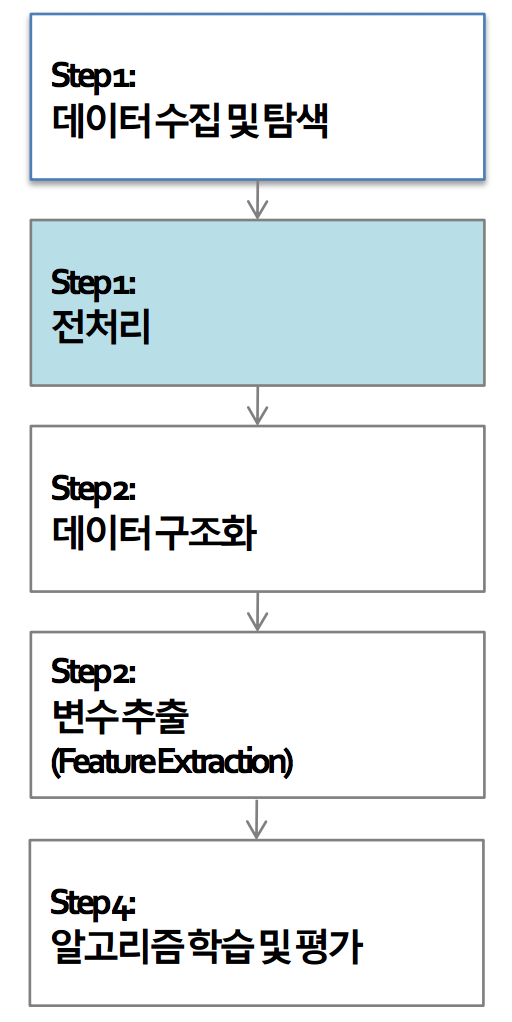

전처리는 아래 세부 과정으로 다시 한 번 나뉜다.

1. Load text
2. Tokenize text (ex. stemming, morph analyzing)
3. Tag Tokens (ex. POS, NER)
4. Token(Feature) selection and/or filter/rank tokens (ex. stopword removal, TF-IDF)
5. and so on (ex. calculate word/document similarities, cluster documents)

### Useful Python Packages for Text Mining and NLP

#### 1. NLTK

In [1]:
!pip install nltk

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


주요기능
1. [Text Corpora](http://www.nltk.org/book/ch02.html)
2. [Word POS, NER classification](http://www.nltk.org/api/nltk.tag.html)
3. [Document classification](http://www.nltk.org/book/ch06.html)

In [3]:
import nltk

nltk.download('gutenberg')
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/choigww/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/choigww/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


True

#### 2. KoNLPy
: Provies modules for Korean text analysis

In [4]:
!pip install konlpy

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


주요기능
1. [Text Corpora](http://konlpy.org/en/latest/data/#corpora)
2. [Word POS classification](http://konlpy.org/en/latest/api/konlpy.tag/)
  * Hannanum
  * Kkma
  * Mecab
  * Komoran
  * Twitter

#### 3. [Gensim](https://www.lucypark.kr/courses/2015-dm/http//radimrehurek.com/gensim/) 
: Provies modules for topic modeling and calculating similarities among documents

* 주요기능
  1. Topic Modeling
    * [Latent Dirichlet allocation (LDA)](http://radimrehurek.com/gensim/models/ldamodel.html)
    * [Latent semantic indexing (LSI)](http://radimrehurek.com/gensim/models/lsimodel.html)
    * [Hierarchical Dirichlet Process (HDP)](http://radimrehurek.com/gensim/models/hdpmodel.html)
  2. Word embedding
    * [word2vec](https://www.lucypark.kr/courses/2015-dm/radimrehurek.com/gensim/models/word2vec.html)
    

# Text exploration

## 1. Read document
이 튜토리얼에서는 NLTK, KoNLPy에서 제공하는 문서들을 사용한다.

* 영어 : [소설 Emma (Jane Austen)](http://www.gutenberg.org/ebooks/158)
* 한국어 : [대한민국 국회 제 1809890호 의안](http://pokr.kr/bill/1809890)

In [11]:
# English
from nltk.corpus import gutenberg
files_en = gutenberg.fileids()
doc_en = gutenberg.open('austen-emma.txt').read()

In [51]:
doc_en[:30]

'[Emma by Jane Austen 1816]\n\nVO'

In [13]:
# Korean
from konlpy.corpus import kobill
files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()

In [52]:
doc_ko[:30]

'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n'

## 2. Tokenize
문서를 토큰으로 나누는 방법은 다양하다. 여기서는 영어에 `nltk.regexp_tokenize`, 한국어에는 `konlpy.tag.Twitter.morph`를 사용해 보자.

In [113]:
# eng
from nltk import regexp_tokenize

#pattern = r'''(?x) ([A-Za-z]\.)+ | \w+(-\w+)* | \$?\d+(\.\d+)?%? | \.\.\. | [][.,;"'?():-_`]'''
# \w+  ---  sequences of 'word' characters
# \$?\d+(\.\d+)?  ---  currency amounts, e.g. $12.50
# ([A-Z]\.)+  ---  abbreviations, e.g. U.S.A.
# [^\w\s]+  ---  sequences of punctuation
#pattern = r'''(?x) \w+ | \$?\d+(\.\d+)? | ([A-Z]\.)+ | [^\w\s]+'''


pattern = r'\s+'

tokens_en = regexp_tokenize(doc_en, pattern, gaps=True)

In [115]:
tokens_en[:10]

['[Emma',
 'by',
 'Jane',
 'Austen',
 '1816]',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma']

In [20]:
# kor
from konlpy.tag import Twitter; t = Twitter()
tokens_ko = t.morphs(doc_ko)

/usr/local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [116]:
tokens_ko[:10]

['지방공무원법', '일부', '개정', '법률', '안', '\n\n', '(', '정의화', '의원', '대표']

## 3. Load tokens with `nltk.Text()`
`nltk.Text()`는 문서 하나를 편리하게 탐색할 수 있는 다양한 기능을 제공한다.

In [120]:
# eng
import nltk
en = nltk.Text(tokens_en)

In [121]:
# kor
ko = nltk.Text(tokens_ko, name='대한민국 국회 의안 제 1809890호')

지금부터 `nltk.Text()`가 제공하는 다양한 기능을 하나씩 살펴보자.
* 참고링크 : [class nltk.text.Text API 문서](http://www.nltk.org/api/nltk.html#nltk.text.Text)

### 1. Tokens

In [122]:
# en
print(len(en.tokens))       # returns number of tokens (document length)
print(len(set(en.tokens)))  # returns number of unique tokens

#en.vocab()

158167
17409


In [123]:
# ko
print(len(ko.tokens))       # returns number of tokens (document length)
print(len(set(ko.tokens)))  # returns number of unique tokens
#ko.vocab()                  # returns frequency distribution

1777
476


### 2. Plot frequency distributions

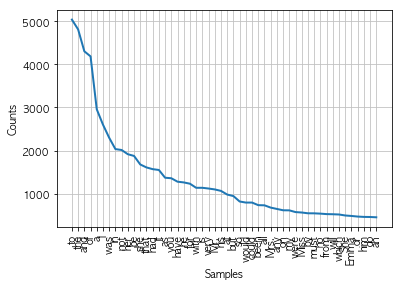

In [124]:
# eng
en.plot(50) # Plot sorted frequency of top 50 tokens

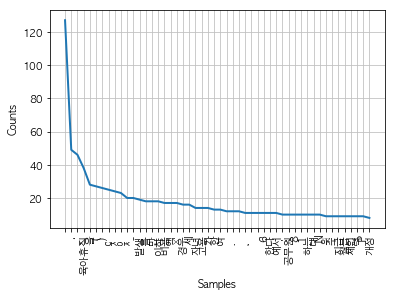

In [125]:
ko.plot(50) # Plot sorted frequency of top 50 tokens

In [40]:
# Troubleshooting

from matplotlib import font_manager, rc
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [127]:
from matplotlib.pyplot import figure
figure(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

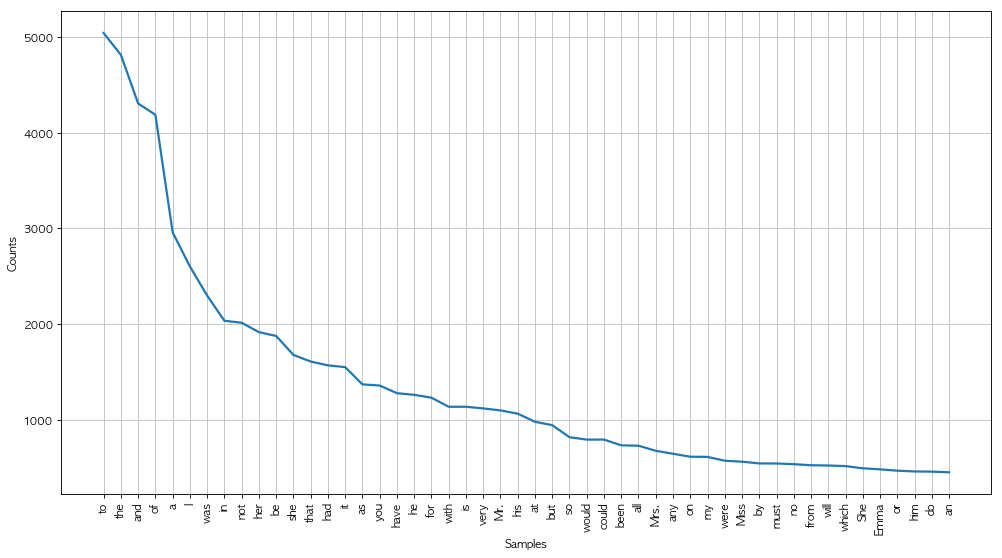

In [128]:
en.plot(50) # Plot sorted frequency of top 50 tokens

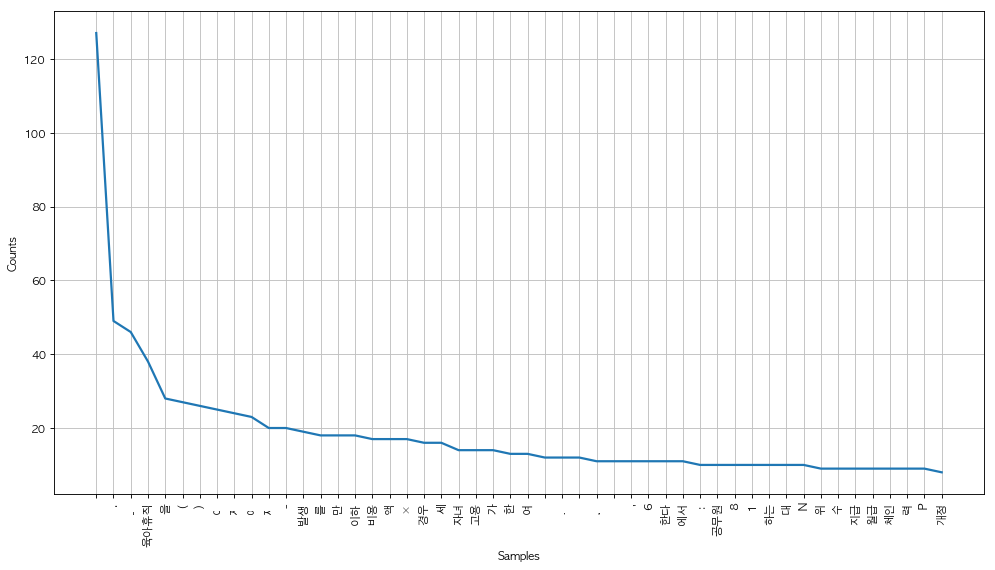

In [129]:
figure(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
ko.plot(50)

### 3. Count

In [130]:
# eng
en.count('Emma')

481

In [131]:
# kor
ko.count('초등학교')

6

### 4. Dispersion plot

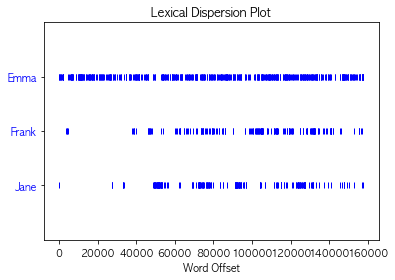

In [132]:
# eng
en.dispersion_plot(['Emma', 'Frank', 'Jane'])

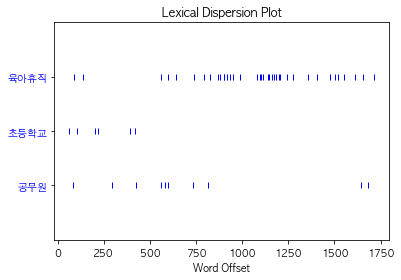

In [133]:
# kor
ko.dispersion_plot(['육아휴직', '초등학교', '공무원'])

### 5. Concordance

In [134]:
# eng
en.concordance('Emma', lines=5)

Displaying 5 of 481 matches:
                                     Emma Woodhouse, handsome, clever, and ric
d friend very mutually attached, and Emma doing just what she liked; highly es
ding-day of this beloved friend that Emma first sat in mournful thought of any
oing only half a mile from them; but Emma was aware that great must be the dif
day. It was a melancholy change; and Emma could not but sigh over it, and wish


In [135]:
ko.concordance('초등학교')

Displaying 6 of 6 matches:
학송 의원 ( 10 인 ) 

 제안 이유 및 주요 내용 

   초등학교 저학년 의 경우 에도 부모 의 따뜻한 사랑 과 보살핌이 필요 


 을 할 수 있는 자녀 의 나이 는 만 6 세 이하 로 되어 있어 초등학교 저학년 인 자녀 를 돌보기 위 해서는 해당 부모님 은 일자리 를 
. 

 제 63조 제 2 항제 4 호 중 “ 만 6 세 이하 의 초등학교 취학 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 
 전 자녀 를 ” 을 “ 만 8 세 이하 ( 취학 중인 경우 에는 초등학교 2 학년 이하 를 말 한다 ) 의 자녀 를 ” 

 로 한다 . 
 3 . ( 현행 과 같음 ) 

   4 . 만 6 세 이하 의 초등학교 취 

   4 . 만 8 세 이하 ( 취학 중인 경우 

 학 
취학 중인 경우 

 학 전 자녀 를 양육 하기 위 하 

 에는 초등학교 2 학년 이하 를 여 필요하거나 여자 공무원 이 말 한다 ) 의 


### 6. Find similar words

In [137]:
# eng
en.similar('Emma')
print('---')
en.similar('Frank')

she he i it and you her weston there harriet the they that elton jane
who his knightley but this
---
the and her it that a my she i his but all he jane miss being him what
this weston


In [138]:
# kor
ko.similar('자녀')
print('---')
ko.similar('육아휴직')

논의
---



### Collocations


In [139]:
# eng
en.collocations()

Mr. Knightley; Mrs. Weston; Frank Churchill; Mr. Elton; every thing;
Miss Woodhouse,; great deal; Mr. Knightley,; Mrs. Weston,; Mr. Weston;
Miss Bates; Mr. Woodhouse; every body; Mrs. Elton; Miss Fairfax; Jane
Fairfax; said he,; John Knightley; dare say; Frank Churchill,


In [140]:
# kor
ko.collocations()

초등학교 저학년;      ③⋅④; 육아휴직 대상자


* For more info on `nltk.Text()` - See the [source code](http://www.nltk.org/_modules/nltk/text.html#Text) or [API](http://www.nltk.org/api/nltk.html#nltk.text.Text).

# Tagging and chunking
현재까지는 token 단위로 텍스트를 조사하는 방식이었음. 이제 part-of-speech 태그라고 불리는 클래스로 단어를 라벨링하여 더 큰 덩어리로 텍스트를 뭉쳐볼 것(chunk).

## 1. POS tagging

* There are numerous ways of tagging a text. Among them, the most frequently used, and developed way of tagging is arguably POS tagging.
* Since one document is too long to observe a parsed structure, lets use one short sentence for each language.

In [141]:
# eng
tokens = "The little yellow dog barked at the Persian cat".split()
tags_en = nltk.pos_tag(tokens)

In [142]:
tags_en

[('The', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Persian', 'JJ'),
 ('cat', 'NN')]

* It is also possible to use the famous `Stanford POS tagger with NLTK`, with `from nltk.tag.stanford import POSTagger`

In [143]:
# kor

In [145]:
from konlpy.tag import Twitter; t=Twitter()
tags_ko = t.pos("작고 느린 강아지가 페르시안 고양이에게 짖었다")

/usr/local/lib/python3.6/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [146]:
tags_ko

[('작고', 'Noun'),
 ('느린', 'Adjective'),
 ('강아지', 'Noun'),
 ('가', 'Josa'),
 ('페르시안', 'Noun'),
 ('고양이', 'Noun'),
 ('에게', 'Josa'),
 ('짖었다', 'Verb')]

### 2. Noun phrase chunking
`nltk.RegexParser()` - great way to chunk

In [148]:
# eng
parser_en = nltk.RegexpParser("NP: {<DT>?<JJ>?<NN.*>*}")
chunks_en = parser_en.parse(tags_en)
chunks_en.draw()

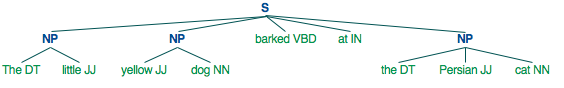

In [161]:
from IPython.display import Image
Image(filename='./img/en_noun_phrase_chunk.png') 

In [ ]:
# kor
parser_ko = nltk.RegexpParser("NP: {<Adjective>*<Noun>*}")
chunks_ko = parser_ko.parse(tags_ko)
chunks_ko.draw()

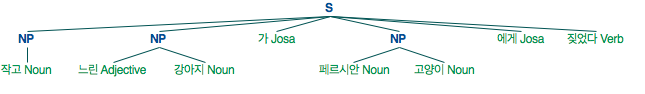

In [163]:
Image(filename='./img/ko_noun_phrase_chunk.png')

# Drawing a word cloud

[1] 제 1809890호 의안의 빈도분포(frequency distribution)를 다시 살펴보자.

In [164]:
print(ko.vocab())

<FreqDist with 476 samples and 1777 outcomes>


[2] 이 빈도분포의 data type과 attribute 목록 확인.

In [168]:
type(ko.vocab())

nltk.probability.FreqDist

In [169]:
dir(ko.vocab())

['B',
 'N',
 'Nr',
 '_N',
 '__add__',
 '__and__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__isub__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__missing__',
 '__module__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_cumulative_frequencies',
 '_keep_positive',
 'clear',
 'copy',
 'elements',
 'freq',
 'fromkeys',
 'get',
 'hapaxes',
 'items',
 'keys',
 'max',
 'most_common',
 'pformat',
 'plot',
 'pop',
 'popitem',
 'pprint',
 'r_Nr',
 'setdefault',
 'subtract',
 'tabulate',
 'unicode_repr',
 'update',
 'values']

[3] `items()`를 사용하면 빈도분포의 item 전체를 set의 형태로 볼 수 있다. 이를 `data`라는 이름의 변수에 저장한 뒤, data type을 관찰.

In [171]:
data = ko.vocab().items()
print(data)
print(type(data))

dict_items([('지방공무원법', 4), ('일부', 4), ('개정', 8), ('법률', 7), ('안', 6), ('\n\n', 127), ('(', 27), ('정의화', 2), ('의원', 2), ('대표', 1), ('발의', 2), (')', 26), ('\n\n ', 1), ('의', 46), ('\n ', 1), ('번', 1), ('호', 8), ('9890', 1), ('연월일', 1), (':', 10), ('2010', 2), ('.', 49), ('11', 2), ('12', 1), ('발', 1), ('자', 24), ('․', 11), ('이명수', 1), ('김을동', 1), ('이사철', 1), ('여상규', 1), ('안규백', 1), ('황영철', 1), ('박영아', 1), ('김정훈', 1), ('김학송', 1), ('10', 3), ('인', 5), ('제안', 1), ('이유', 1), ('및', 4), ('주요', 1), ('내용', 1), ('\n\n  ', 12), ('초등학교', 6), ('저학년', 2), ('경우', 16), ('에도', 2), ('부모', 1), ('따뜻한', 1), ('사랑', 1), ('과', 11), ('보살핌이', 1), ('필요', 1), ('한', 13), ('나이', 2), ('이나', 2), (',', 11), ('현재', 3), ('공무원', 10), ('이', 25), ('자녀', 14), ('를', 18), ('양육', 2), ('하기', 2), ('위', 9), ('하여', 7), ('육아휴직', 38), ('을', 28), ('할', 6), ('수', 9), ('있는', 2), ('는', 6), ('만', 18), ('6', 11), ('세', 16), ('이하', 18), ('로', 12), ('되어', 1), ('있어', 1), ('돌보기', 1), ('해서는', 1), ('해당', 4), ('부모님', 1), ('은', 12), ('일자리', 1), ('

[4] 위 set을 `words.csv`라는 파일로 저장

In [176]:
import csv
with open('words.csv', 'w', encoding='utf-8') as f:
    f.write('word,freq\n')
    writer = csv.writer(f)
    writer.writerows(data)

In [204]:
words_csv = pd.read_csv('words.csv')
words_csv.head(10)

,word,freq
0,지방공무원법,4
1,일부,4
2,개정,8
3,법률,7
4,안,6
5,\n\n,127
6,(,27
7,정의화,2
8,의원,2
9,대표,1


[5] 빈도순 정렬 후 출력

In [208]:
words_csv_sorted = words_csv.sort_values(by='freq', ascending=False)

In [210]:
words_csv_sorted[:10]

,word,freq
5,\n\n,127
21,.,49
13,의,46
67,육아휴직,38
68,을,28
6,(,27
11,),26
60,이,25
25,자,24
155,에,23


[6] 워드클라우드로 그려보기

In [225]:
from wordcloud import WordCloud

In [232]:
reader = csv.reader(open('words.csv', 'r', newline='\n', encoding='utf-8'))
d = {}

for i, (k, v) in enumerate(reader):
    #print(i,k,v)
    if i==0:
        continue
    d[k] = float(v)
    #print('input')



In [241]:
# Generate a word cloud image
wordcloud = WordCloud('/Library/Fonts/AppleGothic.ttf').generate_from_frequencies(d) 

In [243]:
# Set fond and figure size
font_fname = '/Library/Fonts/AppleGothic.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)
figure(figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

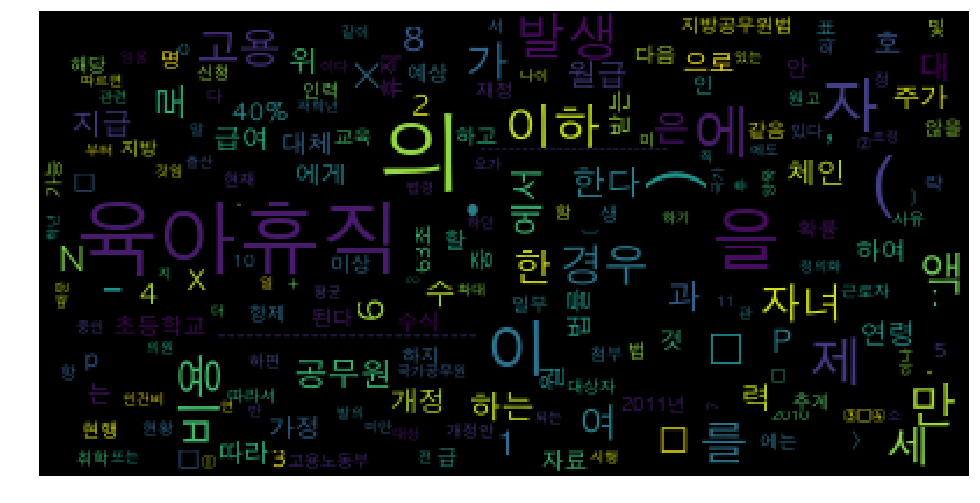

In [244]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()